In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [2]:
import os


data=pd.read_json("loan_data.json")

In [3]:
data

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [4]:
#data = pd.DataFrame(data)
#data.to_csv (r'C:/Users/jpinf/Downloads/loan prediction/train.csv', index = False, header=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


In [6]:
data.isnull().sum()

Application_ID        0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Income                0
Application_Status    0
dtype: int64

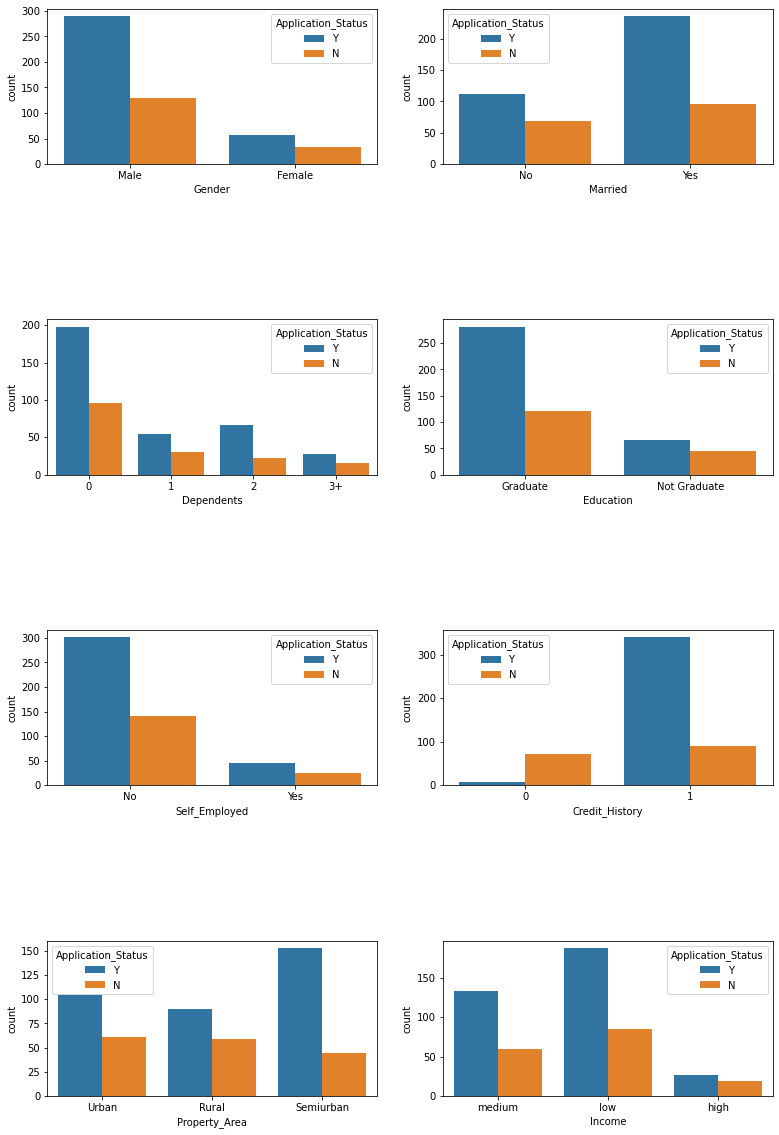

In [7]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(4,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Application_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

In [8]:
data

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y


In [9]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
data.loc[data['Gender']=='Male','Gender'] = 1
data.loc[data['Gender']=='Female', 'Gender'] =0

In [11]:
data['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data.loc[data['Married']=='Yes','Married'] = 1
data.loc[data['Married']=='No', 'Married'] =0

In [13]:
data['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [14]:
data.loc[data['Dependents']=='0','Dependents'] = 0
data.loc[data['Dependents']=='1', 'Dependents'] =1
data.loc[data['Dependents']=='2','Dependents'] = 2
data.loc[data['Dependents']=='3+', 'Dependents'] =3

In [15]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [16]:
data.loc[data['Education']=='Graduate','Education'] = 1
data.loc[data['Education']=='Not Graduate', 'Education'] =0

In [17]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
data.loc[data['Self_Employed']=='Yes','Self_Employed'] = 1
data.loc[data['Self_Employed']=='No', 'Self_Employed'] =0

In [19]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [20]:
data.loc[data['Property_Area']=='Urban','Property_Area'] = 0
data.loc[data['Property_Area']=='Rural', 'Property_Area'] =1
data.loc[data['Property_Area']=='Semiurban', 'Property_Area'] =2

In [21]:
data['Income'].unique()

array(['medium', 'low', 'high'], dtype=object)

In [22]:
data.loc[data['Income']=='low','Income'] = 0
data.loc[data['Income']=='medium', 'Income'] =1
data.loc[data['Income']=='high', 'Income'] =2

In [23]:
data['Application_Status'].unique()

array(['Y', 'N'], dtype=object)

In [24]:
data.loc[data['Application_Status']=='Y','Application_Status'] = 'You Are elligible for loan'
data.loc[data['Application_Status']=='N', 'Application_Status'] = 'No, You are not elligible for loan'

In [25]:
data

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,1,0,0,1,0,1,0,1,You Are elligible for loan
1,LP001003,1,1,1,1,0,1,1,1,"No, You are not elligible for loan"
2,LP001005,1,1,0,1,1,1,0,0,You Are elligible for loan
3,LP001006,1,1,0,0,0,1,0,0,You Are elligible for loan
4,LP001008,1,0,0,1,0,1,0,1,You Are elligible for loan
...,...,...,...,...,...,...,...,...,...,...
506,LP002978,0,0,0,1,0,1,1,0,You Are elligible for loan
507,LP002979,1,1,3,1,0,1,1,1,You Are elligible for loan
508,LP002983,1,1,1,1,0,1,0,1,You Are elligible for loan
509,LP002984,1,1,2,1,0,1,0,1,You Are elligible for loan


In [44]:
data['Credit_History'].unique()

array([1, 0], dtype=int64)

In [26]:
X= data [['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Income']]

In [27]:
y=data['Application_Status']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)

In [32]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [33]:
gb.score(X_train,y_train)

0.8161764705882353

In [34]:
from sklearn.metrics import accuracy_score
y_pred = gb.predict(X_test )
accuracy_score(y_pred,y_test)

0.7766990291262136

In [35]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=45)  
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=45)

In [36]:
classifier.score(X_train,y_train)

0.803921568627451

In [37]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.8252427184466019

In [38]:
import sklearn.metrics

In [39]:
print(sklearn.metrics.classification_report(y_test, y_pred))

                                    precision    recall  f1-score   support

No, You are not elligible for loan       0.85      0.53      0.65        32
        You Are elligible for loan       0.82      0.96      0.88        71

                          accuracy                           0.83       103
                         macro avg       0.83      0.74      0.77       103
                      weighted avg       0.83      0.83      0.81       103



In [40]:
y_pred = classifier.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)

In [41]:
cm

array([[17, 15],
       [ 3, 68]], dtype=int64)

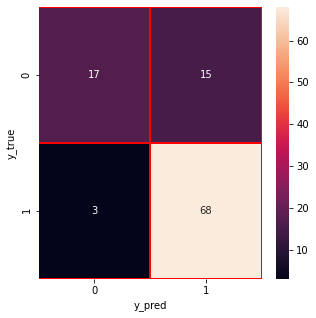

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [43]:
import pickle

pickle.dump(classifier,open('loan.pkl','wb'))
svm = pickle.load(open('loan.pkl','rb'))